<a href="https://colab.research.google.com/github/marekskk/ML-basics/blob/main/Selection_of_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature ranking:
1. feature worst concave points (0.1456)
2. feature mean concave points (0.1193)
3. feature worst area (0.0951)
4. feature mean concavity (0.0824)
5. feature worst perimeter (0.0785)
6. feature worst radius (0.0680)
7. feature mean perimeter (0.0531)
8. feature mean area (0.0502)
9. feature mean radius (0.0488)
10. feature worst concavity (0.0371)
11. feature area error (0.0354)
12. feature radius error (0.0350)
13. feature worst texture (0.0235)
14. feature mean compactness (0.0211)
15. feature worst compactness (0.0181)
16. feature mean texture (0.0151)
17. feature perimeter error (0.0132)
18. feature worst smoothness (0.0074)
19. feature concavity error (0.0069)
20. feature mean smoothness (0.0068)
21. feature worst fractal dimension (0.0052)
22. feature worst symmetry (0.0050)
23. feature symmetry error (0.0047)
24. feature mean fractal dimension (0.0046)
25. feature smoothness error (0.0046)
26. feature texture error (0.0040)
27. feature concave points error (0.00

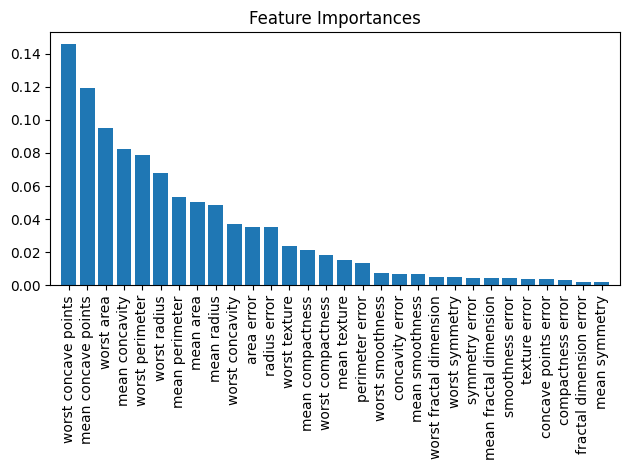

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

# Load sample dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest with hyperparameter tuning
model = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [ 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
# you can use other feature importance technique - i.e. permutation importance

# Feature Importance
importances = best_model.feature_importances_

# Sort feature importances
indices = importances.argsort()[::-1]  # Sort indices in descending order

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")

# Plot feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Select important features (example: keep top k features)
k = 10  # Example: keep top 10 features, experiment with lower and higher number !!
selected_features = indices[:k]

# Create new datasets with selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train and evaluate the model with selected features
# ... (Train the model with X_train_selected, evaluate on X_test_selected)